# 🗽 Manhattan Case Study Tutorial

Welcome to the Manhattan case study tutorial for FleetPy! This notebook will guide you through running and analyzing simulations using the Manhattan benchmark dataset from our 2025 paper applications.

## 🎯 What we'll cover:
1. 🔧 Environment Setup 
2. 📦 Data Setup
3. 🚗 Running Simulations
   - Batch Assignment Example
   - Multiple Operators Example
4. 📊 Analyzing Results

## 🔧 Environment Setup

First, let's make sure we have all required packages installed and import necessary modules.

In [10]:
import os
import sys
import matplotlib.pyplot as plt

# Add FleetPy path
fleetpy_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(fleetpy_path)

# Import FleetPy modules
import src.misc.config as config
from src.misc.globals import *
from utils.analysis import (
    compare_batch_assignments, 
    plot_key_metrics_comparison, 
    plot_vehicle_status_comparison,
    plot_operator_comparison,
    load_multi_operator_metrics
)
from utils.download_data import check_manhattan_data
from utils.simulation_utils import run_missing_scenarios

print(f"Python version: {sys.version}")
print("✅ All required packages are installed!")

Python version: 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:23:34) [Clang 18.1.8 ]
✅ All required packages are installed!


## 📦 Data Setup

The Manhattan case study uses benchmark data that will be automatically downloaded if not present. The data comes from:
https://doi.org/10.5281/zenodo.15187906

The script below will check for the required data in the FleetPy/data directory and download it if missing.

Let's verify our scenario configurations:

In [11]:
# Check and download data if needed
data_ready = check_manhattan_data(fleetpy_path)

✅ All Manhattan data found!


In [12]:
# Set paths to scenario configurations
SC_PATH = scs_path = os.path.join(os.getcwd(), 'scenarios')

# Example 1 - Batch Assignment
cc_batch = os.path.join(SC_PATH, "const_cfg_ex1_batch_assignment_manhattan.yaml")
sc_batch = os.path.join(SC_PATH, "scenario_cfg_ex1_batch_assignment_manhattan.csv")

# Example 2 - Multiple Operators
cc_multi = os.path.join(SC_PATH, "const_cfg_ex2_n_operator_manhattan.csv")
sc_multi = os.path.join(SC_PATH, "scenario_cfg_ex2_n_operator_manhattan.csv")

## 🚗 Running Simulations

Now let's run our two example scenarios. Each simulation will process ride requests in the Manhattan area using different strategies.

### Example 1: Batch Assignment
This scenario demonstrates a batch assignment strategy for ride-pooling in Manhattan. Let's first look at the configuration parameters:

In [14]:
# Load and display batch assignment configurations
constant_cfg_batch = config.ConstantConfig(cc_batch)
scenario_cfg_batch = config.ScenarioConfig(sc_batch)

print("\n📋 Batch Assignment Configuration:")
print("\nConstant config parameters:")
for key, value in constant_cfg_batch.items():
    print(f"  - {key}: {value}")

print("\nScenario config parameters:")
for scenario in scenario_cfg_batch:
    for key, value in scenario.items():
        print(f"  - {key}: {value}")


📋 Batch Assignment Configuration:

Constant config parameters:
  - sim_env: BatchOfferSimulation
  - log_level: info
  - network_type: NetworkTTMatrix
  - network_name: Manhattan_2019_corrected
  - nw_dynamic_f: 2018-11-12_mean_tt_factor_hourly.csv
  - demand_name: Manhattan_2018
  - random_seed: 0
  - start_time: 0
  - end_time: 86400
  - time_step: 60
  - user_max_decision_time: 60
  - route_output_flag: True
  - replay_flag: True
  - nr_mod_operators: 1
  - rq_type: BasicRequest
  - op_module: RidePoolingBatchAssignmentFleetcontrol
  - op_rp_batch_optimizer: AlonsoMora
  - op_fleet_composition: OVERWRITE_IN_SCENARIO_CONFIG
  - op_vr_control_func_dict: {'func_key': 'distance_and_user_times_man', 'vot': 0.45833, 'dc': 0.0694}
  - op_min_wait_time: 0
  - op_max_wait_time: 480
  - op_max_detour_time_factor: 40
  - op_const_boarding_time: 30
  - op_add_boarding_time: 0
  - op_base_fare: 0
  - op_distance_fare: 0
  - op_time_fare: 0
  - op_min_standard_fare: 100
  - op_reoptimisation_tim

In [15]:
# Run missing batch assignment scenarios
run_missing_scenarios(
    scenario_cfg_batch,
    cc_batch,
    sc_batch,
    "Manhattan Batch Assignment",
    fleetpy_path,
    SC_PATH
)

✅ All Manhattan Batch Assignment simulation results already exist, skipping simulation...


### Example 2: Multiple Operators
For the second example, we'll use the existing multiple operators configuration files to simulate multiple fleet operators serving the Manhattan area.

In [16]:
# Load and run missing multi-operator scenarios
multi_op_scenarios = config.ScenarioConfig(sc_multi)
run_missing_scenarios(
    multi_op_scenarios,
    cc_multi,
    sc_multi,
    "Multiple Operators",
    fleetpy_path,
    SC_PATH
)

✅ All Multiple Operators simulation results already exist, skipping simulation...


## 📊 Result Analysis

Let's analyze the results of our simulations. We'll look at various metrics including:
1. Service rates and wait times
2. Vehicle status distribution over time
3. Fleet utilization and occupancy rates
4. Average waiting time
5. Operator comparison for multiple operators scenario

### Analysis of Batch Assignment Approaches

Let's compare the three different batch assignment approaches:
1. **AM (Alonso-Mora)**: A state-of-the-art algorithm that constructs a graph of feasible trip combinations
2. **LA (Linear Assignment)**: A simpler approach using linear assignment for matching vehicles to requests
3. **IH (Insertion Heuristic)**: A fast heuristic that incrementally inserts requests into vehicle routes

📈 Batch Assignment Comparison:
                      AM        LA        IH
served_users       90.01     89.57     89.13
fleet_util         71.06     71.25     70.86
shared_rides       84.95     81.88     81.68
avg_wait_time       4.69      4.35      4.32
avg_detour         18.49     17.06     16.78
avg_occupancy       1.33      1.31      1.31
total_distance  48007.76  48188.97  47877.09


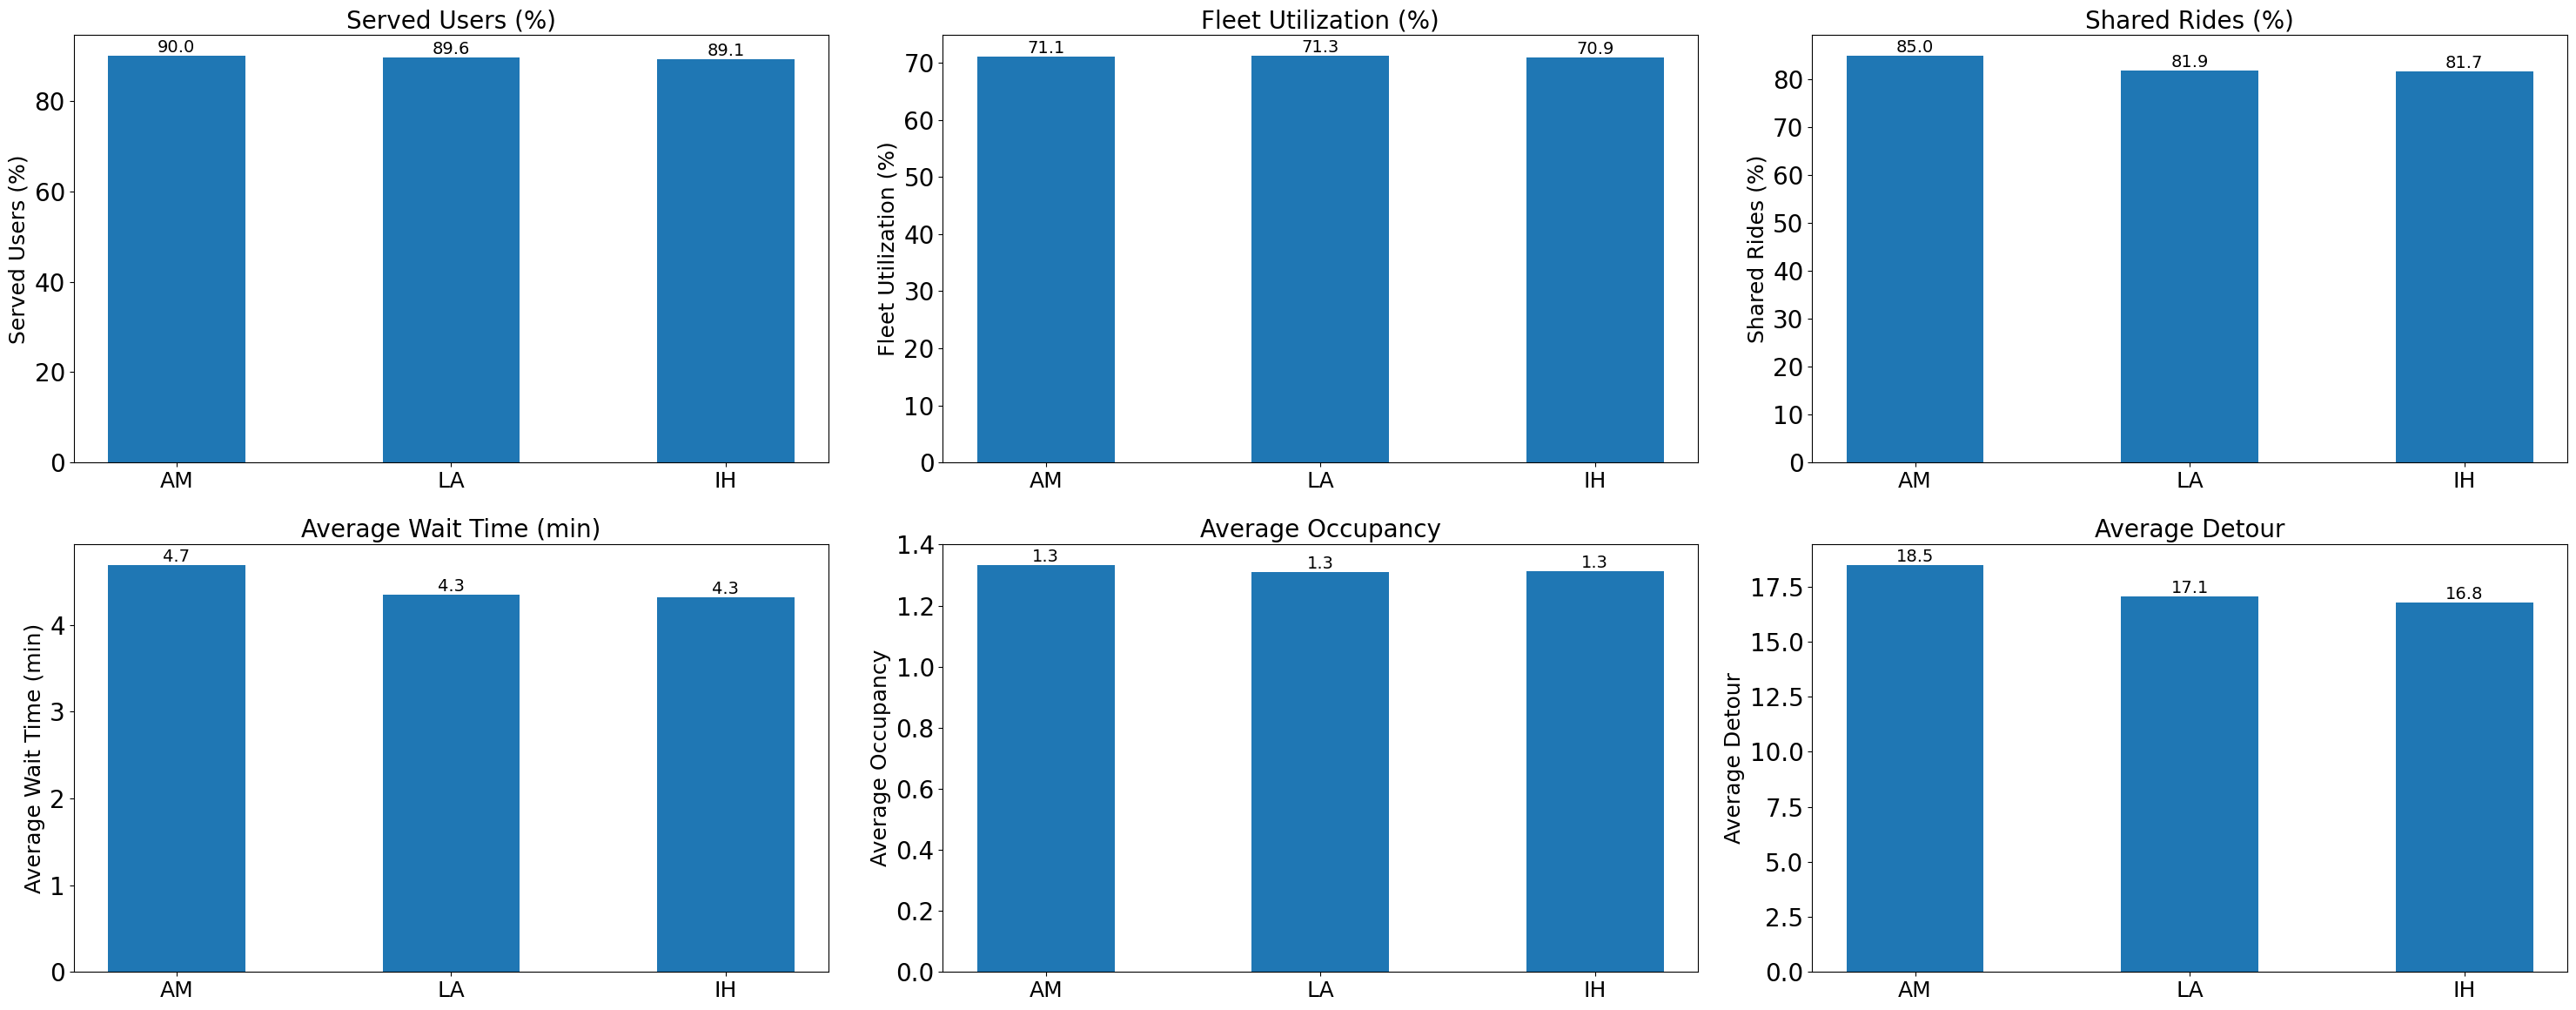


🚗 Vehicle Status Distribution Over Time:


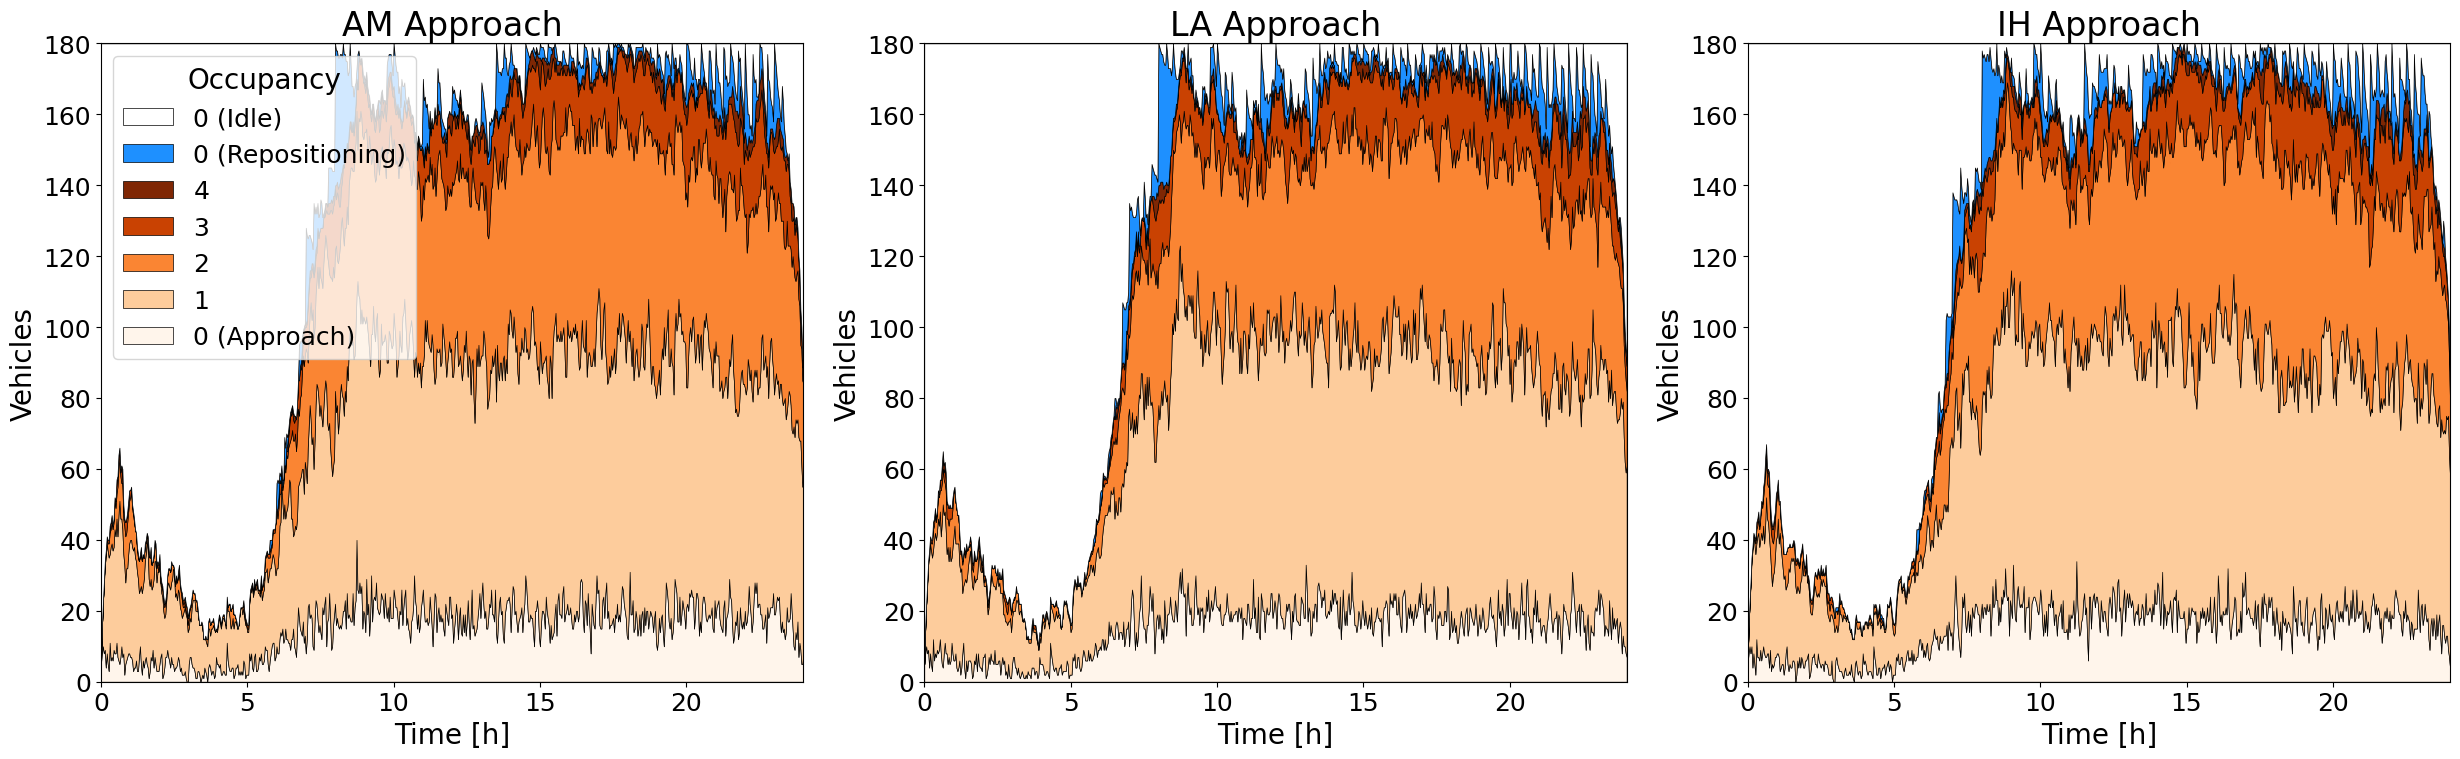

In [17]:
# Compare results from all three approaches

# Get comparison results
df_comparison = compare_batch_assignments(scenario_cfg_batch, fleetpy_path)

if df_comparison is not None:
    # Print batch assignment comparison
    print('📈 Batch Assignment Comparison:')
    print(df_comparison.round(2))
    
    # Plot key metrics comparison
    plot_key_metrics_comparison(df_comparison)
    plt.show()

    # Plot vehicle status distribution
    print("\n🚗 Vehicle Status Distribution Over Time:")
    plot_vehicle_status_comparison(scenario_cfg_batch, fleetpy_path)
    plt.show()

### Analysis of Multiple Operators

Now let's analyze how hailing and pooling services compete under different discount rates and value of time (VOT) scenarios. We'll look at:
1. Fleet utilization patterns
2. Modal split between services
3. Operator profits under different scenarios

🔄 Loading metrics for all scenarios...
✅ Successfully loaded metrics for 3 scenarios

🚗 Fleet Utilization Analysis:


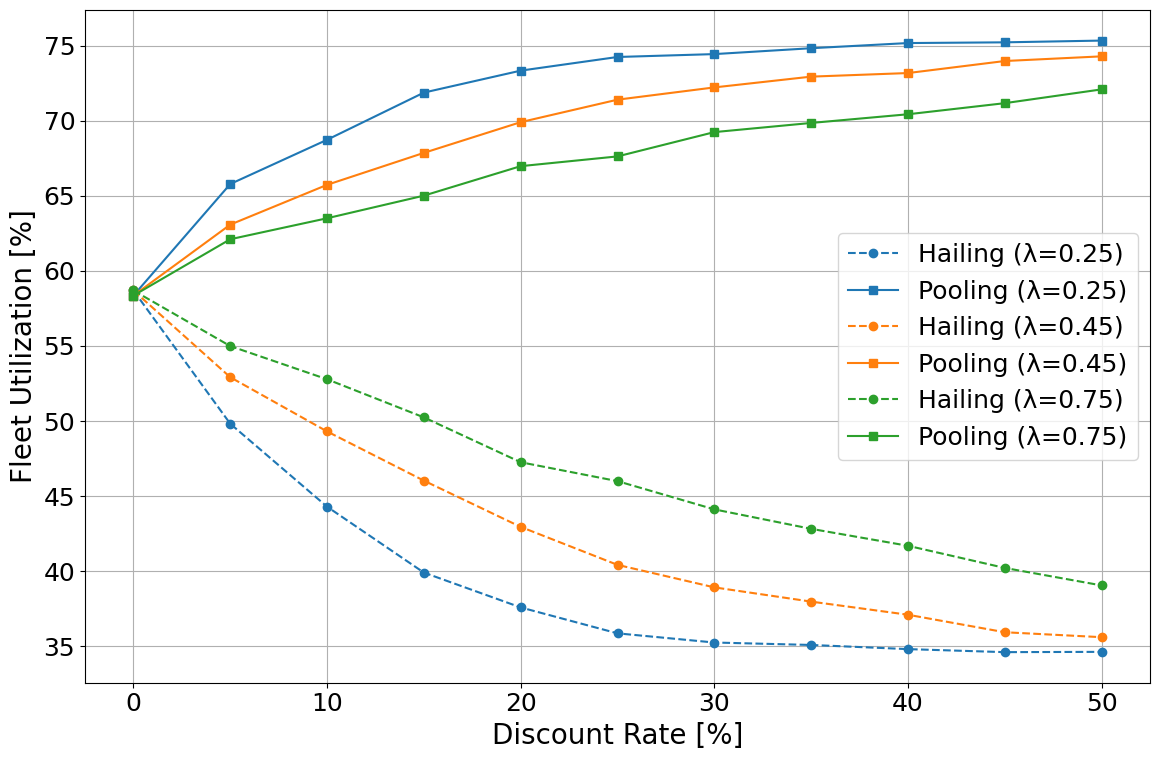


🚗 Modal Split Analysis:


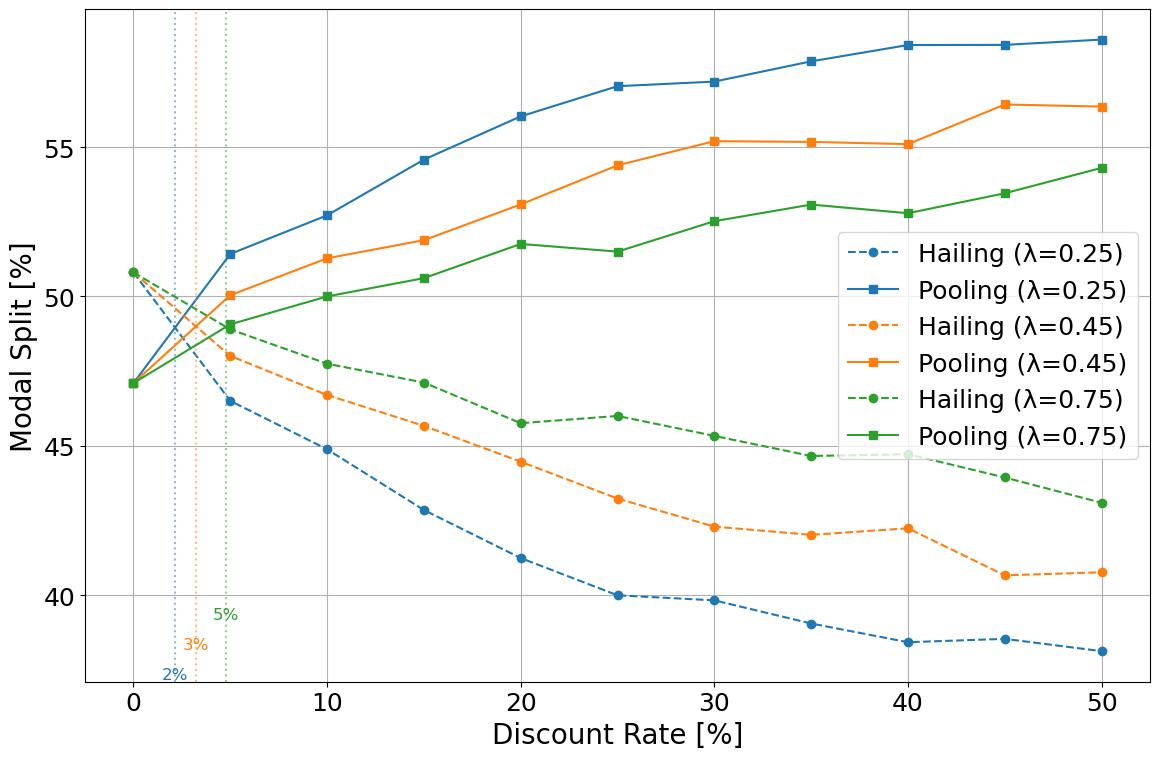


💰 Profit Analysis:


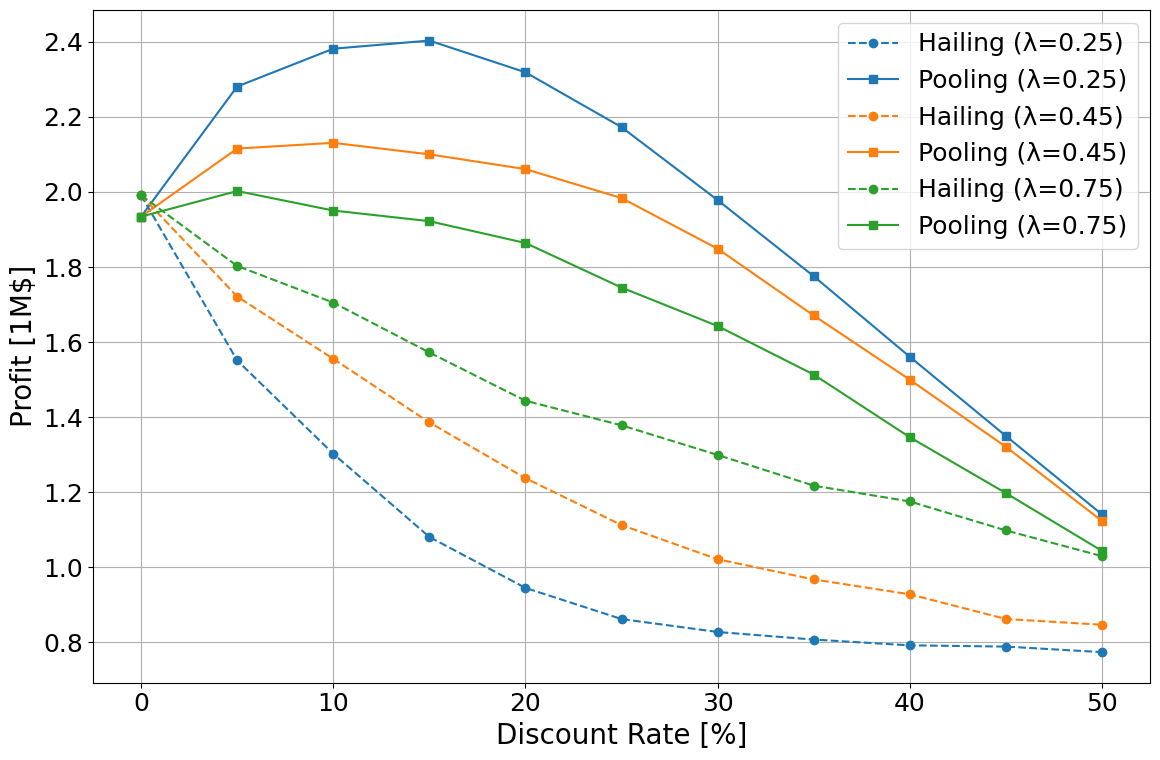

In [18]:
# Set up paths and parameters
base_results_dir = os.path.join(os.getcwd(), 'results')

# Check if results directory exists
if not os.path.exists(base_results_dir):
    print(f"❌ Results directory not found at {base_results_dir}")
    print("Please run the simulations first.")
else:
    vot_values = [0.25, 0.45, 0.75]  # VOT values to analyze
    discount_rates = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Discount rates to evaluate

    print("🔄 Loading metrics for all scenarios...")
    # Load metrics for all scenarios
    df_metrics = load_multi_operator_metrics(base_results_dir, vot_values, discount_rates)

    if df_metrics is None or not df_metrics:
        print("❌ No results found for the specified scenarios.")
        print("Please verify that the simulations completed successfully.")
    else:
        print(f"✅ Successfully loaded metrics for {len(df_metrics)} scenarios")
        
        # Plot fleet utilization comparison
        print("\n🚗 Fleet Utilization Analysis:")
        plot_operator_comparison(
            df_metrics,
            ('hailing_fleet_util', 'pooling_fleet_util'),
            'Fleet Utilization [%]'
        )
        plt.show()

        # Plot modal split with intersections
        print("\n🚗 Modal Split Analysis:")
        plot_operator_comparison(
            df_metrics,
            ('hailing_modal_split', 'pooling_modal_split'),
            'Modal Split [%]',
            add_intersections=True
        )
        plt.show()

        # Plot profit comparison
        print("\n💰 Profit Analysis:")
        plot_operator_comparison(
            df_metrics,
            ('hailing_profit', 'pooling_profit'),
            'Profit [1M$]'
        )
        plt.show()

The plots above show how the two services (hailing and pooling) compete under different scenarios:

1. **Fleet Utilization**: Shows how effectively each service uses its vehicle fleet.
2. **Modal Split**: Shows the market share of each service, with intersection points indicating where preferences shift.
3. **Profit**: Shows the financial performance of each service under different discount rates.


## 🎯 Summary

In this tutorial, we've:
1. Set up and run two different Manhattan case study scenarios
2. Analyzed the results with detailed metrics and visualizations:
   - Service rates and wait times for each operator
   - Vehicle status distribution over time
   - Fleet utilization patterns
   - Comparison between operators in the multi-operator scenario

The Manhattan case study demonstrates FleetPy's capabilities in handling large-scale ride-pooling simulations with different operational strategies. This implementation is part of our 2025 paper applications studying the impact of various fleet operational strategies in urban environments.